In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Context:**

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.



### **Objective:**
SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML_DS_Resources/SuperKart.csv')
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


<Axes: xlabel='Product_Weight', ylabel='Count'>

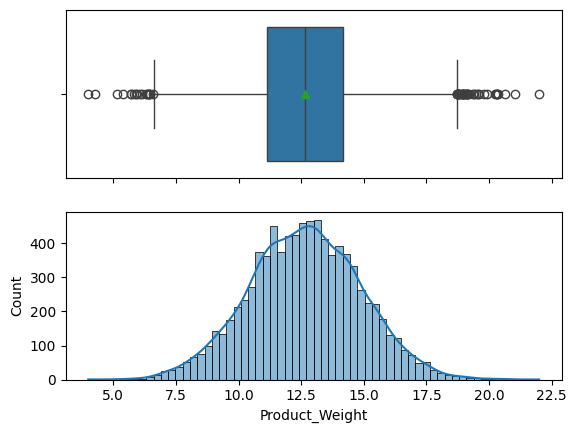

In [4]:
fig, ax = plt.subplots(2, 1, sharex = True)
sns.boxplot(data = df, x = 'Product_Weight', ax = ax[0], showmeans = True)
sns.histplot(data = df, x = 'Product_Weight', ax = ax[1], kde = True)

In [5]:
def hist_box(data, feature):
  fig, ax = plt.subplots(2, 1, sharex = True)
  sns.boxplot(data = df, x = feature, ax = ax[0], showmeans = True)
  sns.histplot(data = df, x = feature, ax = ax[1], kde = True)

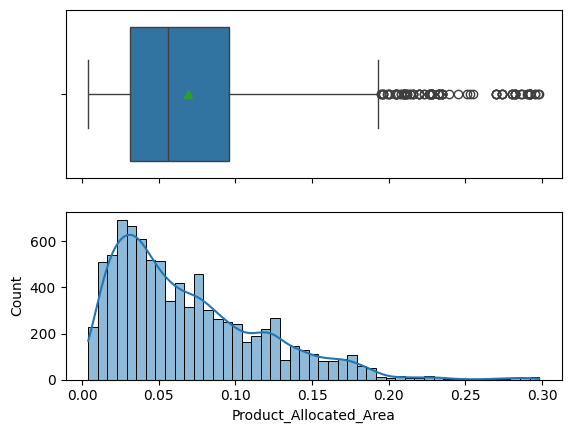

In [6]:
hist_box(df, 'Product_Allocated_Area')

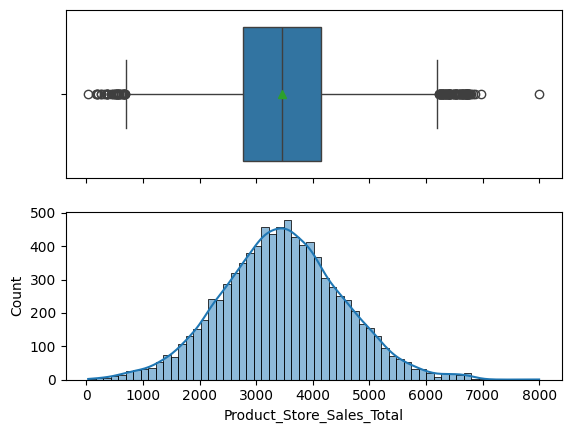

In [7]:
hist_box(df, 'Product_Store_Sales_Total')

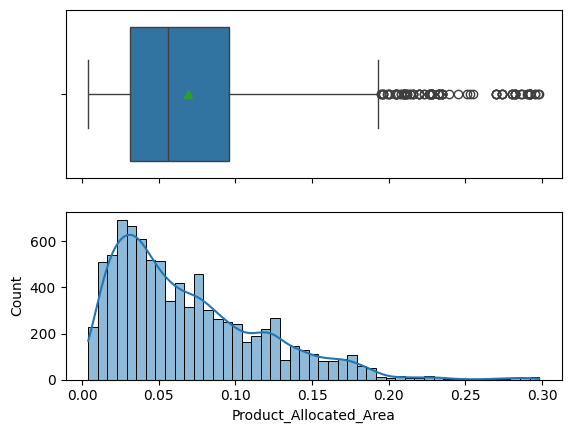

In [8]:
hist_box(df, 'Product_Allocated_Area')

In [9]:
df['Product_Type'].nunique()

16

In [10]:
df['Product_Type'].value_counts()

,count
Product_Type,
Fruits and Vegetables,1249
Snack Foods,1149
Frozen Foods,811
Dairy,796
Household,740
Baking Goods,716
Canned,677
Health and Hygiene,628
Meat,618


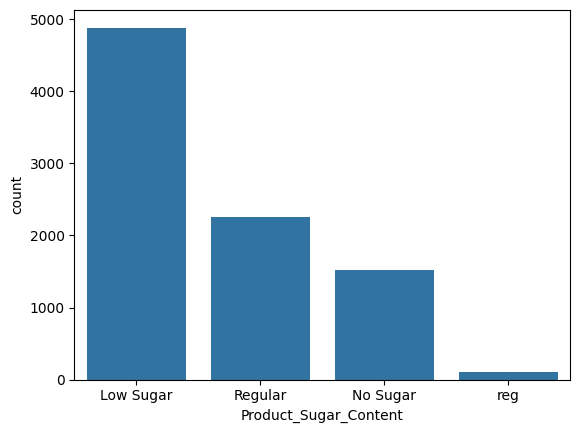

In [11]:
ax = sns.countplot(df, x = "Product_Sugar_Content")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Canned'),
  Text(3, 0, 'Baking Goods'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Meat'),
  Text(7, 0, 'Household'),
  Text(8, 0, 'Hard Drinks'),
  Text(9, 0, 'Fruits and Vegetables'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Breakfast'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

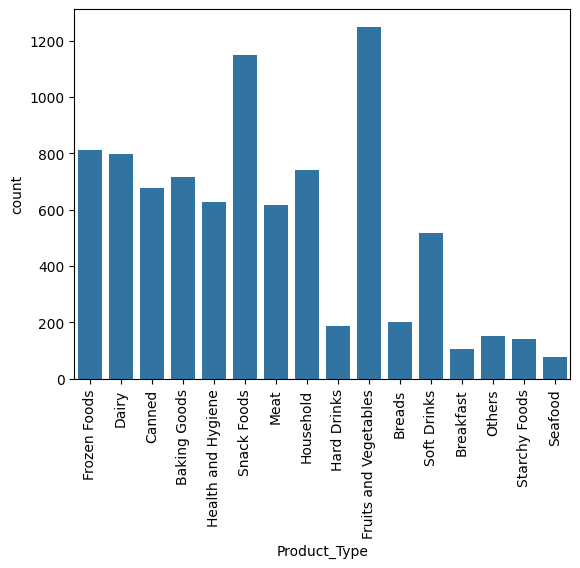

In [12]:
sns.countplot(df, x = 'Product_Type')
plt.xticks(rotation = 90)

<Axes: xlabel='Store_Id', ylabel='count'>

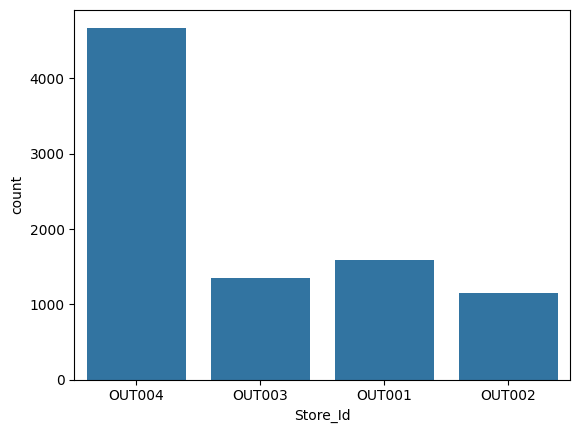

In [13]:
sns.countplot(df, x = 'Store_Id')

**Bivariate Analysis**

In [14]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [15]:
df.dtypes

,0
Product_Id,object
Product_Weight,float64
Product_Sugar_Content,object
Product_Allocated_Area,float64
Product_Type,object
Product_MRP,float64
Store_Id,object
Store_Establishment_Year,int64
Store_Size,object
Store_Location_City_Type,object


In [16]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total
Product_Weight,1.000000,0.014754,0.532716,-0.161907,0.737955
Product_Allocated_Area,0.014754,1.000000,-0.009508,0.004467,-0.000933
Product_MRP,0.532716,-0.009508,1.000000,-0.189357,0.787989
Store_Establishment_Year,-0.161907,0.004467,-0.189357,1.000000,-0.185027
Product_Store_Sales_Total,0.737955,-0.000933,0.787989,-0.185027,1.000000


<Axes: >

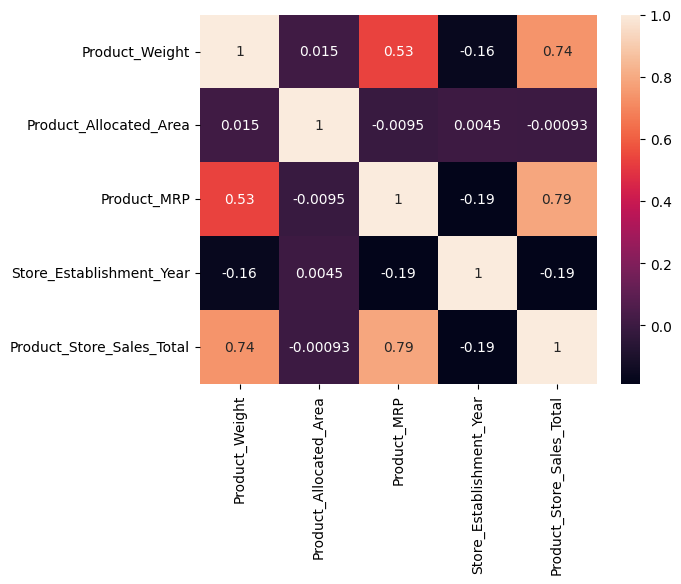

In [17]:
sns.heatmap(numeric_df.corr(), annot = True)

In [18]:
df['Store_Id'].value_counts()

,count
Store_Id,
OUT004,4676
OUT001,1586
OUT003,1349
OUT002,1152


In [19]:
#Total Sales per store
#Most of the revenue comes from store 4
df.groupby('Store_Id')['Product_Store_Sales_Total'].sum()

,Product_Store_Sales_Total
Store_Id,
OUT001,6223113.18
OUT002,2030909.72
OUT003,6673457.57
OUT004,15427583.43


In [20]:
#Analyze the first store, make data frame of only the first store
df[df['Store_Id'] == 'OUT001']

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
24,FD2557,13.32,Regular,0.007,Snack Foods,204.53,OUT001,1987,High,Tier 2,Supermarket Type1,4780.97
32,FD5621,15.14,Low Sugar,0.052,Snack Foods,148.06,OUT001,1987,High,Tier 2,Supermarket Type1,4037.27
39,DR1777,14.52,Low Sugar,0.054,Soft Drinks,184.39,OUT001,1987,High,Tier 2,Supermarket Type1,4638.79
...,...,...,...,...,...,...,...,...,...,...,...,...
8746,FD6518,14.72,Regular,0.033,Snack Foods,183.18,OUT001,1987,High,Tier 2,Supermarket Type1,4659.17
8752,FD102,10.06,Low Sugar,0.127,Snack Foods,93.41,OUT001,1987,High,Tier 2,Supermarket Type1,3998.13
8755,FD5840,14.46,Low Sugar,0.030,Baking Goods,156.51,OUT001,1987,High,Tier 2,Supermarket Type1,4056.67
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42


See how each product sells in each store

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Canned'),
  Text(1, 0, 'Baking Goods'),
  Text(2, 0, 'Snack Foods'),
  Text(3, 0, 'Soft Drinks'),
  Text(4, 0, 'Meat'),
  Text(5, 0, 'Breakfast'),
  Text(6, 0, 'Frozen Foods'),
  Text(7, 0, 'Fruits and Vegetables'),
  Text(8, 0, 'Dairy'),
  Text(9, 0, 'Hard Drinks'),
  Text(10, 0, 'Starchy Foods'),
  Text(11, 0, 'Health and Hygiene'),
  Text(12, 0, 'Household'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Seafood'),
  Text(15, 0, 'Breads')])

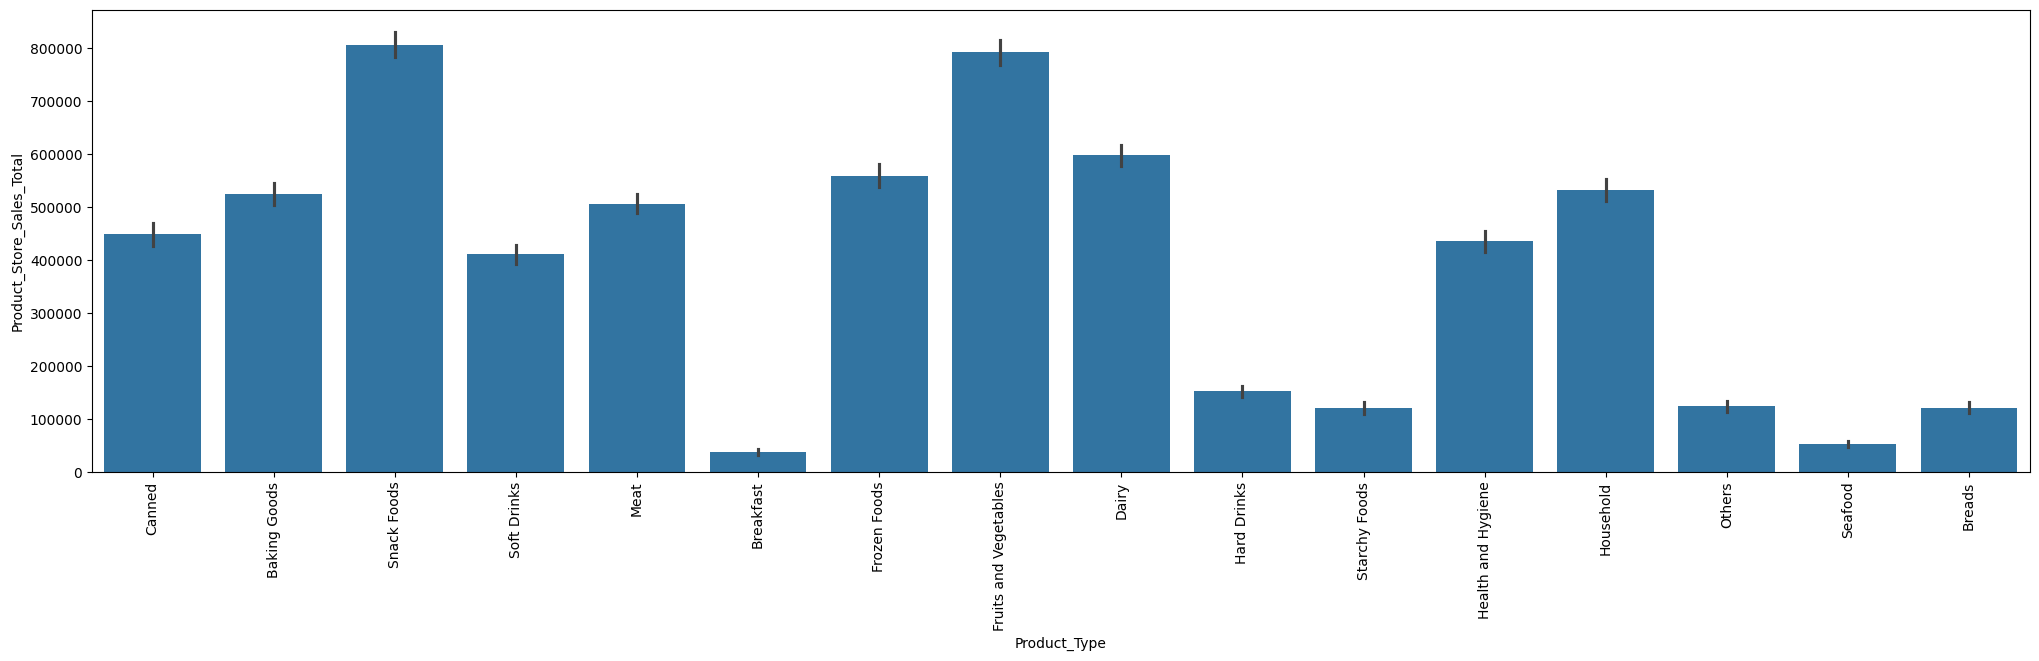

In [21]:
#estimator = np.sum will sum up all the y values, in this case, the product store sales total.
#if we don't use estimator, it will find and return the average instead of total
plt.figure(figsize = (25, 6))
sns.barplot(data = df[df['Store_Id'] == 'OUT001'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Health and Hygiene'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Meat'),
  Text(4, 0, 'Hard Drinks'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Starchy Foods'),
  Text(7, 0, 'Dairy'),
  Text(8, 0, 'Fruits and Vegetables'),
  Text(9, 0, 'Frozen Foods'),
  Text(10, 0, 'Seafood'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Baking Goods'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Breakfast')])

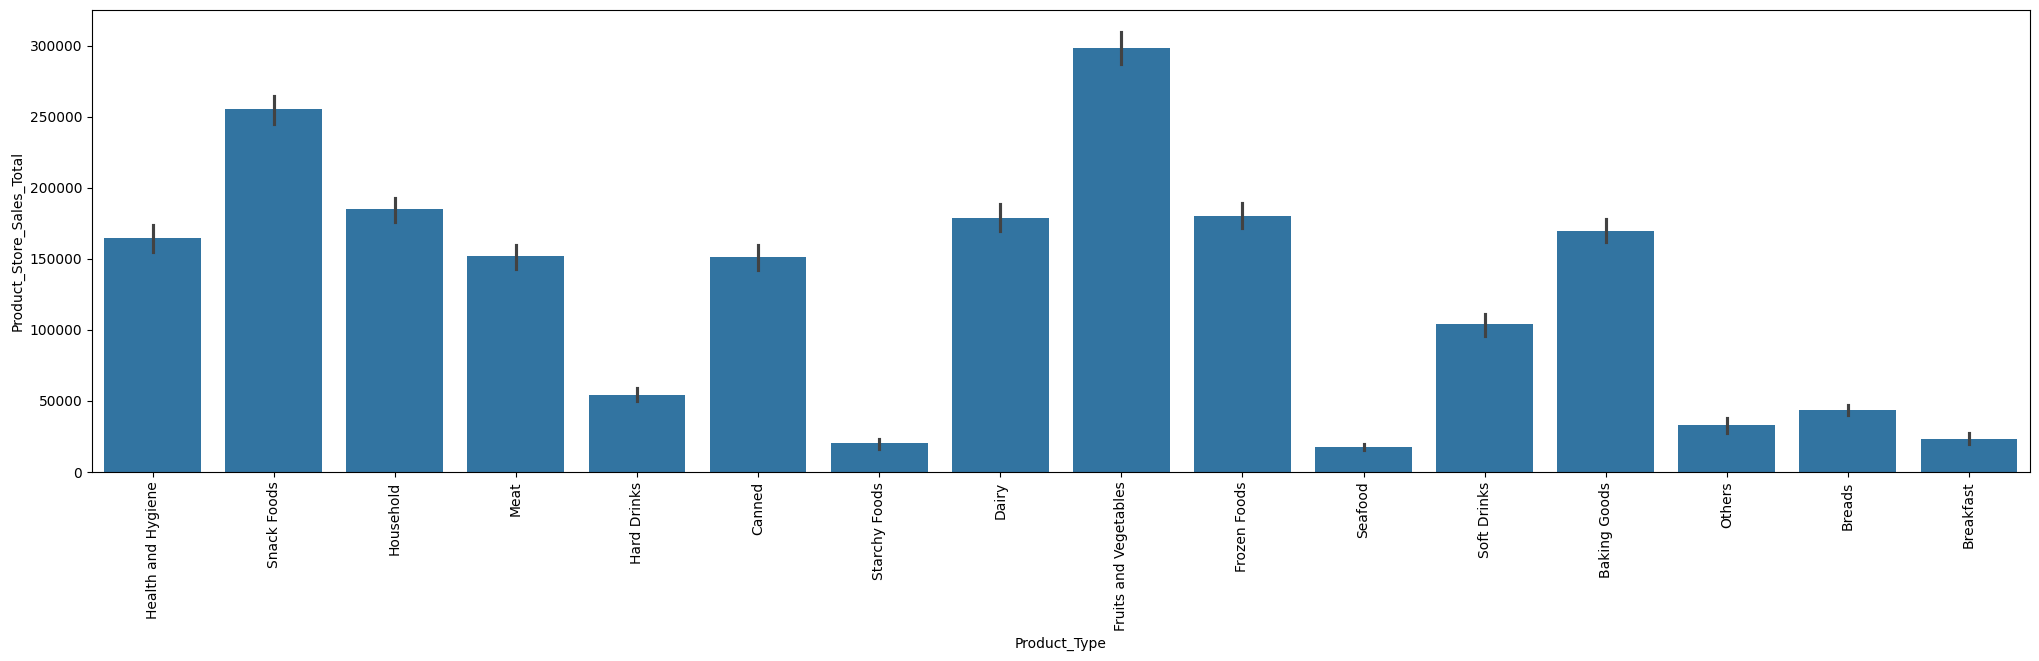

In [22]:
#Second store
plt.figure(figsize = (25, 6))
sns.barplot(data = df[df['Store_Id'] == 'OUT002'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Meat'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Canned'),
  Text(7, 0, 'Soft Drinks'),
  Text(8, 0, 'Baking Goods'),
  Text(9, 0, 'Starchy Foods'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'Breakfast'),
  Text(12, 0, 'Frozen Foods'),
  Text(13, 0, 'Seafood'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Hard Drinks')])

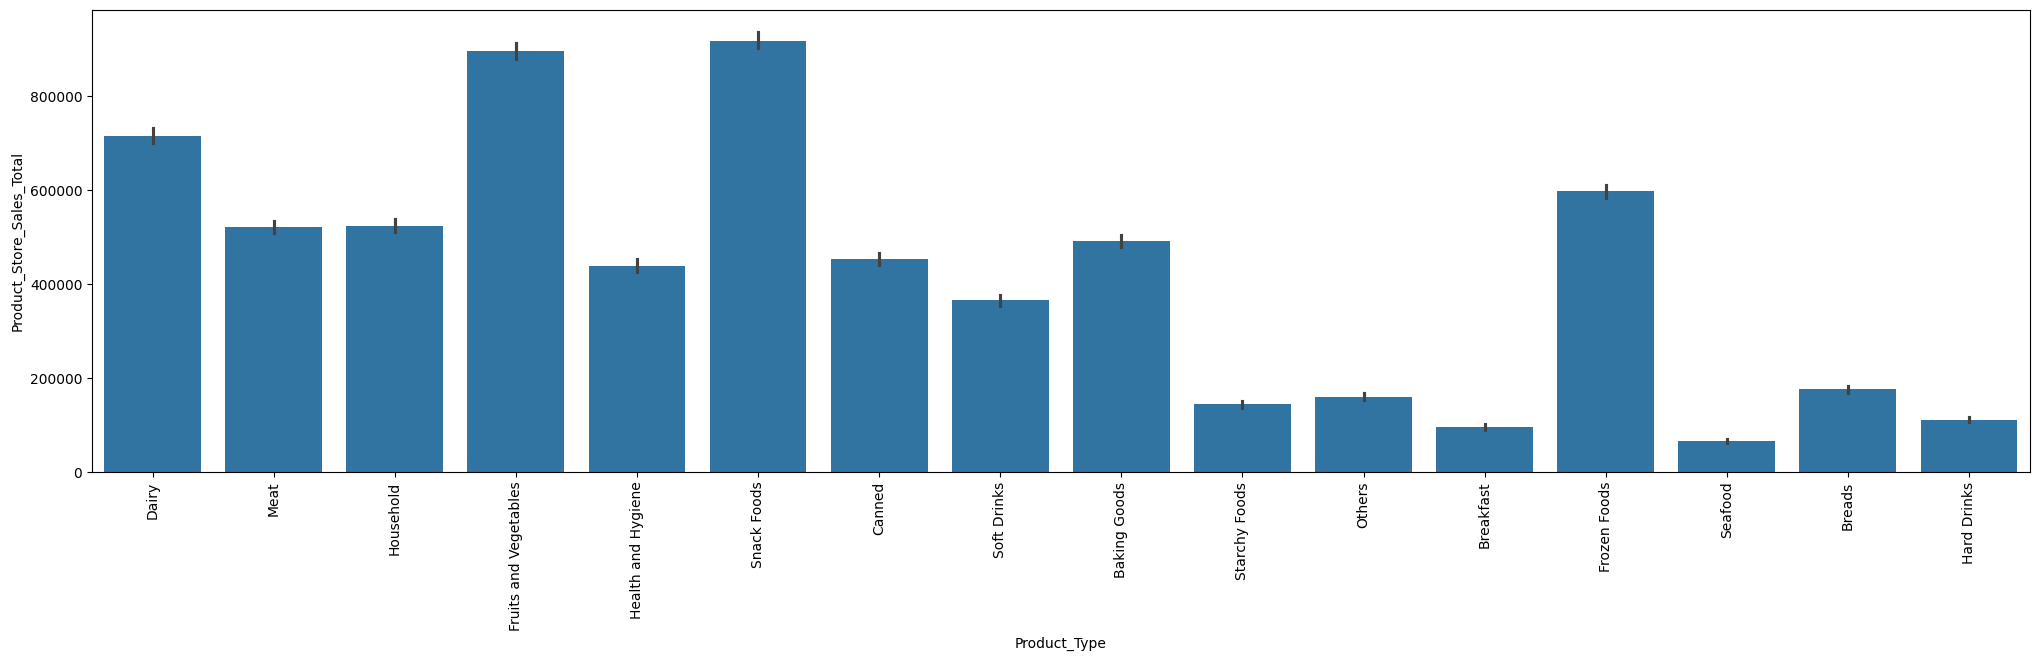

In [23]:
#Third Store
plt.figure(figsize = (25, 6))
sns.barplot(data = df[df['Store_Id'] == 'OUT003'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Health and Hygiene'),
  Text(3, 0, 'Hard Drinks'),
  Text(4, 0, 'Fruits and Vegetables'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Breads'),
  Text(8, 0, 'Household'),
  Text(9, 0, 'Dairy'),
  Text(10, 0, 'Breakfast'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Others'),
  Text(13, 0, 'Meat'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

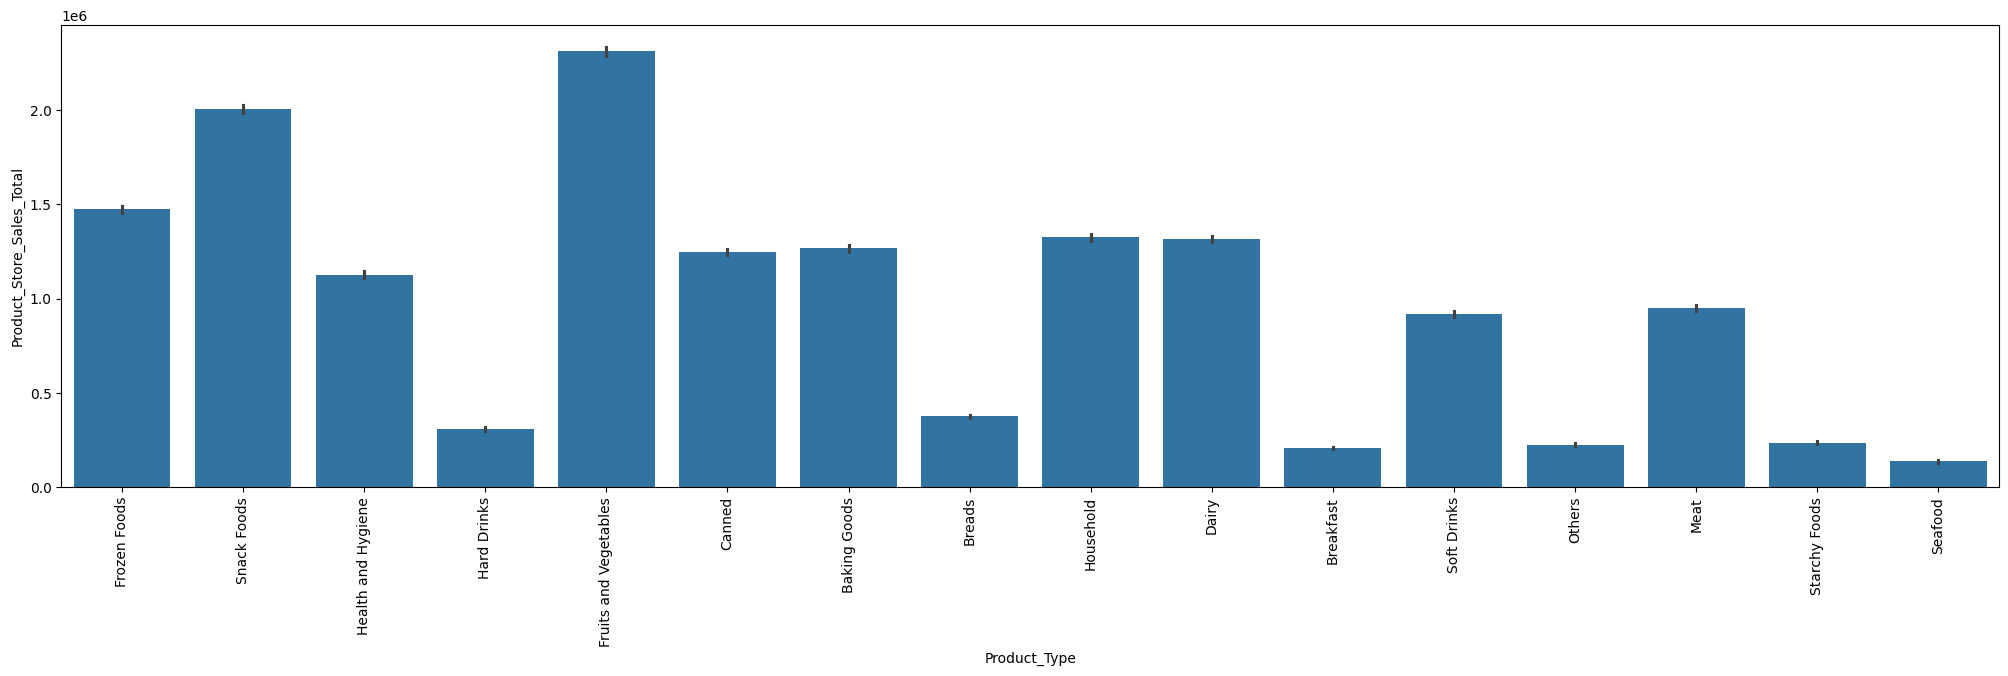

In [24]:
plt.figure(figsize = (25, 6))
sns.barplot(data = df[df['Store_Id'] == 'OUT004'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum)
plt.xticks(rotation = 90)

In [25]:
#crosstab creates a matrix that shows how many of each product type is in each store
pd.crosstab(df['Store_Id'], df['Product_Type'])

Product_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Store_Id,,,,,,,,,,,,,,,,
OUT001,136,30,10,119,150,142,199,38,114,134,130,31,13,202,106,32
OUT002,96,23,15,88,104,101,168,30,91,100,87,19,10,146,62,12
OUT003,99,34,19,90,145,122,182,23,89,107,106,32,13,186,74,28
OUT004,385,113,62,380,397,446,700,95,334,399,295,69,40,615,277,69


<Axes: xlabel='Product_Type', ylabel='Store_Id'>

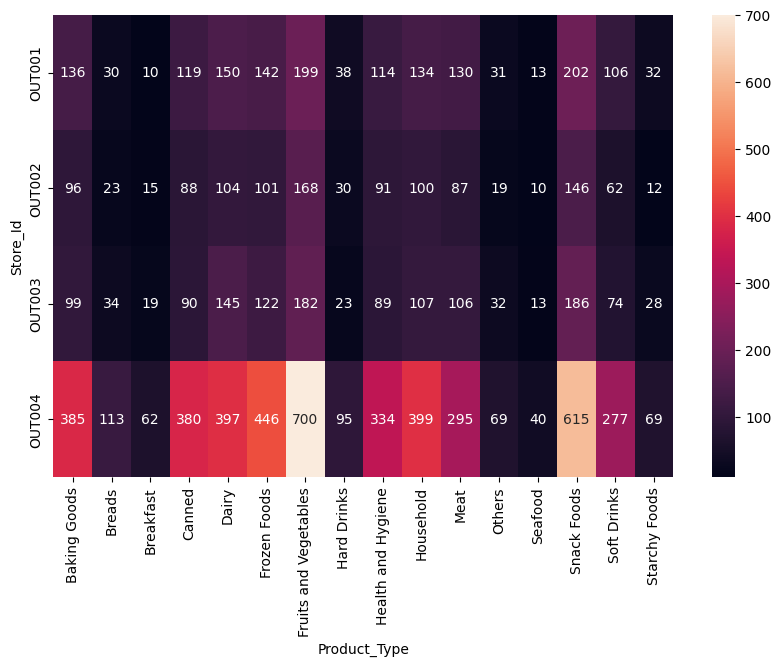

In [26]:
plt.figure(figsize = (10, 6))
sns.heatmap(pd.crosstab(df['Store_Id'], df['Product_Type']), annot = True, fmt = 'g')

We see that store 4 has much more products than any other store, specifically fruits and veggies and snacks

**Continuous Value Prediction**

In [27]:
#Set Product Id to FD, NC, or DR for all products and create new column
df['Product_ID'] = [i[:2] for i in df['Product_Id'].to_list()]

#Remove the old Product_Id column
df.drop('Product_Id', axis = 1, inplace = True)

In [28]:
df

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_ID
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC
...,...,...,...,...,...,...,...,...,...,...,...,...
8758,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53,NC
8759,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74,NC
8760,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42,NC
8761,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82,NC


In [29]:
#Change store establishment to age of store
df['Age'] = 2024 - df['Store_Establishment_Year']
df.drop('Store_Establishment_Year', axis = 1, inplace = True)

In [30]:
#Now we have an age column and removed store establisment year column
df.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_ID,Age
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,FD,15
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,FD,25
2,14.28,Regular,0.031,Canned,162.08,OUT001,High,Tier 2,Supermarket Type1,4130.16,FD,37
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,High,Tier 2,Supermarket Type1,4132.18,FD,37
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,Small,Tier 3,Food Mart,2279.36,NC,26


In [31]:
#List of perishable items
Perishables = ['Fruits and Vegetables', 'Dairy', 'Meat', 'Bread', 'Breakfast', 'Seafood']

#Function that checks each product and sees if they are perishable or not
def product_type_perishable(x):
  if x in Perishables:
    return 'Perishable'
  else:
    return 'Non Perishable'

#Create a new column with a label if they are perishable
df['Product_Type_Categories'] = df['Product_Type'].apply(product_type_perishable)
df


,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_ID,Age,Product_Type_Categories
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,FD,15,Non Perishable
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,FD,25,Perishable
2,14.28,Regular,0.031,Canned,162.08,OUT001,High,Tier 2,Supermarket Type1,4130.16,FD,37,Non Perishable
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,High,Tier 2,Supermarket Type1,4132.18,FD,37,Non Perishable
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,Small,Tier 3,Food Mart,2279.36,NC,26,Non Perishable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,Medium,Tier 2,Supermarket Type2,3806.53,NC,15,Non Perishable
8759,14.06,No Sugar,0.142,Household,144.51,OUT004,Medium,Tier 2,Supermarket Type2,5020.74,NC,15,Non Perishable
8760,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,High,Tier 2,Supermarket Type1,2443.42,NC,37,Non Perishable
8761,13.89,No Sugar,0.193,Household,168.44,OUT001,High,Tier 2,Supermarket Type1,4171.82,NC,37,Non Perishable


In [32]:
#Delete the Product Type column
df.drop(columns = ['Product_Type'], axis = 0, inplace = True)

**One Hot Encoding**converts categorical variables into a numerical format that machine learning algorithms can understand. ex: We have catergorical variables Red and Blue. It then creates 2 columns red and blue, and uses 0 and 1 to determine which color the variable belongs to.

In [33]:
#List of all object and categorical variables

df.select_dtypes(include = ['object', 'category']).columns.to_list()


['Product_Sugar_Content',
 'Store_Id',
 'Store_Size',
 'Store_Location_City_Type',
 'Store_Type',
 'Product_ID',
 'Product_Type_Categories']

In [34]:
#Use one hot encoding to change categorical variables to numerical format
#drops the first category to prevent multicollinearity
df_ohe = pd.get_dummies(data = df,
               columns = df.select_dtypes(include = ['object', 'category']).columns.to_list(),
               drop_first = True
               )

#Convert all bools to int
df_ohe = df_ohe.astype(float)

In [35]:
df_ohe.drop(columns = ['Product_Sugar_Content_reg'], axis = 1, inplace = True)

In [36]:
df_ohe.head(2)

,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Store_Sales_Total,Age,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_ID_FD,Product_ID_NC,Product_Type_Categories_Perishable
0,12.66,0.027,117.08,2842.40,15.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,16.54,0.144,171.43,4830.02,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


[link text](https://)**Split the data into Target and Features**

Remove the Product Store Sales Total column from df_ohe, which is the target variable that the model will try to predict.

In [37]:
#x contains all the input features for the model.
x = df_ohe.drop(columns = ['Product_Store_Sales_Total'], axis = 1)

Assign the Product Store Sales Total to y, and it becomes the target variable that the model will try to predict based on the features in X.

In [38]:
y = df_ohe['Product_Store_Sales_Total']

In [39]:
from sklearn.model_selection import train_test_split

#Set the train and test variables, 70% of the Product Store Sales Total will be used to train the model
#The 30% will be used to test the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

**Test and Remove MultiCollinearity** features that are highly correlated with each other causes problems for the model

**Variance Inflation Factor** detects multicollinearity among the independent features. It quantifies how much the variance of a regression coefficient is inflated due to collinearity with other variables.

VIF = 1: The feature is not correlated with any other features (ideal case).

VIF > 1: The feature is moderately correlated with other features. A value slightly above 1 is generally acceptable.

VIF > 5: There's a moderate correlation that might start to cause issues in your model. You may want to investigate further.

VIF > 10: Indicates high multicollinearity

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
#Calculates the VIF for the first column
print(variance_inflation_factor(x_train, 0))

1.7910367310029367


In [42]:
#Create a data frame that shows the VIF value of each feature
VIF_df = pd.DataFrame()
VIF_df['Features'] = x_train.columns

#Get VIF value of each column and put into VIF_df
VIF_df['VIF'] = [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]
VIF_df

,Features,VIF
0,Product_Weight,1.791037
1,Product_Allocated_Area,1.001000
2,Product_MRP,1.932787
3,Age,inf
4,Product_Sugar_Content_No Sugar,inf
5,Product_Sugar_Content_Regular,1.080491
6,Store_Id_OUT002,inf
7,Store_Id_OUT003,inf
8,Store_Id_OUT004,inf
9,Store_Size_Medium,inf


Store age is the only continuous feature that has a VIF value over 5. We will drop this feature from the train and test.

In [43]:
x_train.drop(columns = ['Age'], axis = 0, inplace = True)

In [44]:
x_test.drop(columns = ['Age'], axis = 0, inplace = True)

In [45]:
#Create a data frame that shows the VIF value of each feature
VIF_df = pd.DataFrame()
VIF_df['Features'] = x_train.columns

#Get VIF value of each column and put into VIF_df
VIF_df['VIF'] = [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]
VIF_df

,Features,VIF
0,Product_Weight,1.791037
1,Product_Allocated_Area,1.001000
2,Product_MRP,1.932787
3,Product_Sugar_Content_No Sugar,inf
4,Product_Sugar_Content_Regular,1.080491
5,Store_Id_OUT002,inf
6,Store_Id_OUT003,inf
7,Store_Id_OUT004,inf
8,Store_Size_Medium,inf
9,Store_Size_Small,inf


**Build the Model**

Ordinary Least Squares regression, OLS, minimizes the sum of squared differences.



In [46]:
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.821
Model:                                   OLS   Adj. R-squared:                  0.821
Method:                        Least Squares   F-statistic:                     2806.
Date:                       Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                               03:14:37   Log-Likelihood:                -46211.
No. Observations:                       6134   AIC:                         9.244e+04
Df Residuals:                           6123   BIC:                         9.252e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Product_Weight                       136.6533      3.472     39.356      0.000     129.846     143.460
Product_Allocated_Area                56.1130    119.903      0.468      0.640    -178.938     291.164
Product_MRP                           13.1226      0.262     49.994      0.000      12.608      13.637
Product_Sugar_Content_No Sugar        11.1496     12.551      0.888      0.374     -13.455      35.754
Product_Sugar_Content_Regular         23.2466     13.711      1.696      0.090      -3.631      50.125
Store_Id_OUT002                     -251.3281     12.167    -20.657      0.000    -275.179    -227.477
Store_Id_OUT003                      326.9585     36.634      8.925      0.000     255.142     398.775
Store_Id_OUT004                     -162.7198      5.244    -31.028      0.000    -173.001    -152.439
Store_Size_Medium                    164.2387     33.317      4.930      0.000      98.926     229.552
Store_Size_Small                    -251.3281     12.167    -20.657      0.000    -275.179    -227.477
Store_Location_City_Type_Tier 2      -97.4207     29.898     -3.258      0.001    -156.032     -38.809
Store_Location_City_Type_Tier 3     -251.3281     12.167    -20.657      0.000    -275.179    -227.477
Store_Type_Food Mart                -251.3281     12.167    -20.657      0.000    -275.179    -227.477
Store_Type_Supermarket Type1          65.2991     33.162      1.969      0.049       0.290     130.309
Store_Type_Supermarket Type2        -162.7198      5.244    -31.028      0.000    -173.001    -152.439
Product_ID_FD                        -23.2283     22.358     -1.039      0.299     -67.058      20.602
Product_ID_NC                         11.1496     12.551      0.888      0.374     -13.455      35.754
Product_Type_Categories_Perishable    26.1177     13.488      1.936      0.053      -0.323      52.558
==============================================================================
Omnibus:                     1943.767   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48983.659
Skew:                           0.949   Prob(JB):                         0.00
Kurtosis:                      16.713   Cond. No.                     1.82e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.23e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
#y_hat refers to the predicted values of the dependent variable, the y
y_hat = model.predict(x_train)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

#R-squared is the proportion of the variance in the dependent variable,It tells you how well the model explains the variability in the data.
r2_score(y_train, y_hat)

0.820883115851224

In [49]:
#MSE measures the average of the squared differences between the actual values (y) and the predicted values (ŷ)
mean_squared_error(y_train, y_hat)

204724.2718188336

In [50]:
#Function to find RMSE, MAE, MAPE ,R2
def model_evaluation(model, X, y):
    y_hat = model.predict(X)

    rmse = np.sqrt(mean_squared_error(y, y_hat))
    mae = mean_absolute_error(y, y_hat)
    mape = mean_absolute_percentage_error(y, y_hat)
    r2 = r2_score(y, y_hat)

    return pd.DataFrame({'RMSE': [rmse], 'MAE': [mae], 'MAPE': [mape], 'R2': [r2]})


In [51]:
model_evaluation(model, x_train, y_train)

,RMSE,MAE,MAPE,R2
0,452.464664,262.578173,0.100462,0.820883


In [52]:
model_evaluation(model, x_test, y_test)

,RMSE,MAE,MAPE,R2
0,433.009223,252.809907,0.096292,0.832272


Now we can test the p-values for each variable to see the significance of the train data to the test data. If it has little significance, it can be removed to better the model.

In [53]:
#Residuals help us understand how far off the model’s predictions are from the actual values. This caluclates the mean of
#residuals for each value
np.mean(model.resid)

-9.272872293589654e-13

**Homoscedascity** : the residuals, or errors, are spread out evenly across all values

**Heteroscedascity** : the opposite, the erros aren't spread out equally, meaning the model isn't doing too well[link text](https://)

In [54]:
#The predicted store sales, same as model.predict(x_train)
model.fittedvalues

,0
8361,2920.638384
2244,3974.679867
5530,2842.033580
322,3099.292173
4688,3400.388932
...,...
4373,3990.203576
7891,3698.412907
4859,1542.817814
3264,4037.894939


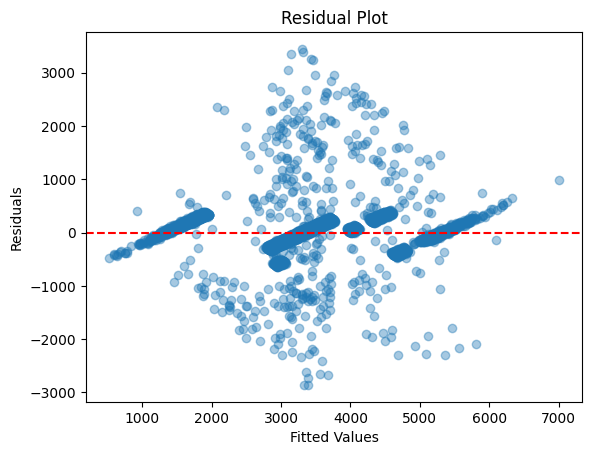

In [55]:
plt.scatter(model.fittedvalues, model.resid, alpha = .4)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

The graph is pretty symetric, meaning the residuals are even and homoschedasitic.

In [56]:
#Perform the Goldfeld-Quandt test for heteroscedasticity.
#Second value in result is the p-value
import statsmodels.stats.api as sms
result = sms.het_goldfeldquandt(model.resid, x_train)
result[1] > 0.05

True

The p-value is much greater than 0.05, assuming 0.05 is our significance level.

We can confidently say it is homoscedascitic and we won't reject the null hypothesis.

**Linearity of Values** assumes that changes in the independent variables result in a proportional change in the dependent variable.

**Normality of Errors** residuals should follow a normal curve, or bell shaped.

<Axes: ylabel='Count'>

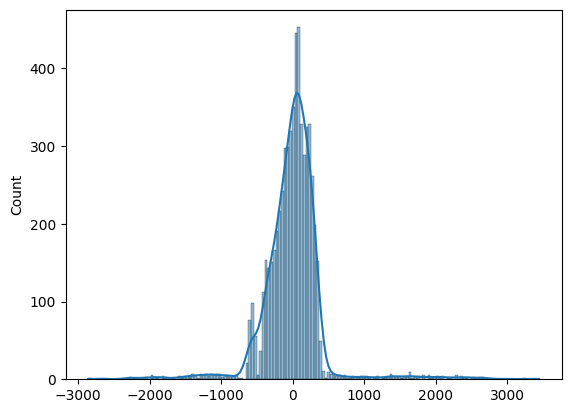

In [57]:
sns.histplot(model.resid, kde = True)

The model shows it is a normal distribution

The **Q-Q plot** compares the quantiles of the residuals to the quantiles of a normal distribution. If the residuals are normally distributed, the points will approximately lie along a straight diagonal line.

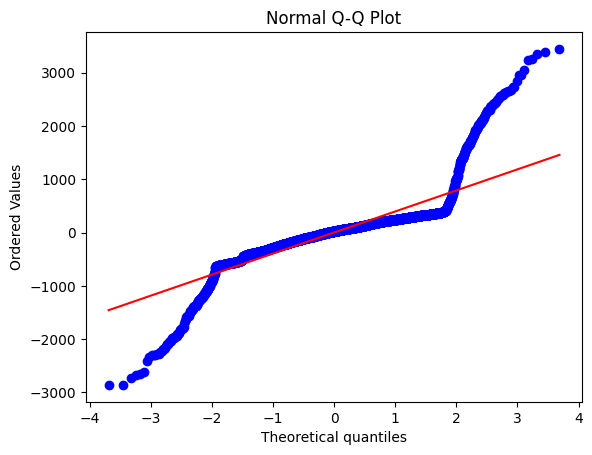

In [58]:
from scipy import stats
import pylab
stats.probplot(model.resid, dist = 'norm', plot = pylab)
plt.title('Normal Q-Q Plot')
plt.show()

**Cross Validation** helps test the model's ability to generalize to new data by splitting the data into multiple training and testing sets. This helps detect if the model overfits the training data.

The model is evaluated multiple times on different test sets created by splitting the data into multiple folds.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [60]:
model2 = LinearRegression()

#Cross validation splits data into 10 folds
#Trains 9 folds, tests 1 fold
#Calculates Mean Absolute Error percentage
#MAE contains the mae percentage of each fold
mae = cross_val_score(model2, x_train, y_train, scoring = 'neg_mean_absolute_percentage_error', cv = 10)
mae

array([-0.10191193, -0.09680755, -0.09548421, -0.10187579, -0.09527512,
       -0.1301528 , -0.0918504 , -0.09133984, -0.10465831, -0.09854612])

In [61]:
np.mean(mae)

-0.1007902068697506

In [62]:
np.std(mae)

0.010621947696578706

In [63]:
#Range of my MAE 99.7 percent of the time
(np.mean(-mae) - 3 * np.std(mae), np.mean(-mae) + 3 * np.std(mae))

(0.06892436378001449, 0.1326560499594867)

The narrow range indicates that your model performs consistently across different subsets of the data, with relatively small variation in error.

In [64]:
np.mean(cross_val_score(model2, x_test, y_test, scoring = 'neg_mean_absolute_percentage_error', cv = 10))

-0.09493165131582795